# DOTA_devkit을 활용한 바운딩 박스 도식

이번 노트북에서는 DOTA_devkit 을 활용하여 이미지에 바운딩 박스를 도식하는 법을 알아봅니다.


이 노트북은 베이스라인으로 제공되는 [ArerialDetection](https://github.com/dacon-ai/AerialDetection) dacon_utils 폴더의 visualization_image.ipynb 파일에 대한 설명입니다.

DOTA_devkit 설치법은 다음 [링크](https://github.com/dingjiansw101/AerialDetection/blob/master/INSTALL.md)에서 확인 가능합니다.

이 노트북은 다음 자료를 참고하여 작성하였습니다. 

[참고링크](https://github.com/CAPTAIN-WHU/DOTA_devkit)

## 라이브러리 임포트
필요한 라이브러리를 임포트해줍니다.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from DOTA import DOTA
import dota_utils as util
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 15.0)


노트북에서 DOTA.py 모듈을 설명하기 위하여 전체 코드를 둘러봅니다.
DOTA.py 모듈은 다음과 같은 코드로 구성되어 있습니다.

In [ ]:
'''
def _isArrayLike(obj):
    if type(obj) == str:
        return False
    return hasattr(obj, '__iter__') and hasattr(obj, '__len__')

class DOTA:
    def __init__(self, basepath):
        self.basepath = basepath
        self.labelpath = os.path.join(basepath, 'labelTxt')
        self.imagepath = os.path.join(basepath, 'images')
        self.imgpaths = util.GetFileFromThisRootDir(self.labelpath)
        self.imglist = [util.custombasename(x) for x in self.imgpaths]
        self.catToImgs = defaultdict(list)
        self.ImgToAnns = defaultdict(list)
        self.createIndex()

    def createIndex(self):
        for filename in self.imgpaths:
            objects = util.parse_dota_poly(filename)
            imgid = util.custombasename(filename)
            self.ImgToAnns[imgid] = objects
            for obj in objects:
                cat = obj['name']
                self.catToImgs[cat].append(imgid)

    def getImgIds(self, catNms=[]):
        """
        :param catNms: category names
        :return: all the image ids contain the categories
        """
        catNms = catNms if _isArrayLike(catNms) else [catNms]
        if len(catNms) == 0:
            return self.imglist
        else:
            imgids = []
            for i, cat in enumerate(catNms):
                if i == 0:
                    imgids = set(self.catToImgs[cat])
                else:
                    imgids &= set(self.catToImgs[cat])
        return list(imgids)

    def loadAnns(self, catNms=[], imgId = None, difficult=None):
        """
        :param catNms: category names
        :param imgId: the img to load anns
        :return: objects
        """
        catNms = catNms if _isArrayLike(catNms) else [catNms]
        objects = self.ImgToAnns[imgId]
        if len(catNms) == 0:
            return objects
        outobjects = [obj for obj in objects if (obj['name'] in catNms)]
        return outobjects
    def showAnns(self, objects, imgId, range):
        """
        :param catNms: category names
        :param objects: objects to show
        :param imgId: img to show
        :param range: display range in the img
        :return:
        """
        img = self.loadImgs(imgId)[0]
        plt.imshow(img)
        plt.axis('off')

        ax = plt.gca()
        ax.set_autoscale_on(False)
        polygons = []
        color = []
        circles = []
        r = 5
        for obj in objects:
            c = (np.random.random((1, 3)) * 0.6 + 0.4).tolist()[0]
            poly = obj['poly']
            polygons.append(Polygon(poly))
            color.append(c)
            point = poly[0]
            circle = Circle((point[0], point[1]), r)
            circles.append(circle)
        p = PatchCollection(polygons, facecolors=color, linewidths=0, alpha=0.4)
        ax.add_collection(p)
        p = PatchCollection(polygons, facecolors='none', edgecolors=color, linewidths=2)
        ax.add_collection(p)
        p = PatchCollection(circles, facecolors='red')
        ax.add_collection(p)
    def loadImgs(self, imgids=[]):
        """
        :param imgids: integer ids specifying img
        :return: loaded img objects
        """
        print('isarralike:', _isArrayLike(imgids))
        imgids = imgids if _isArrayLike(imgids) else [imgids]
        print('imgids:', imgids)
        imgs = []
        for imgid in imgids:
            filename = os.path.join(self.imagepath, imgid + '.png')
            print('filename:', filename)
            img = cv2.imread(filename)
            imgs.append(img)
        return imgs
'''        

## 객체 생성
DOTA.py 모듈안에 있는 DOTA 클래스를 객체에 생성하여 저장합니다.
example은 다음과 같은 경로를 가지고 있습니다.

example

├── images

└── labelTxt

In [2]:
# DOTA('basepath')
example = DOTA('example')

이미지 정보를 불러옵니다. 이미지 정보에 대한 metadata는 labelTxt 파일에 저장되어 있습니다.

In [4]:
imgids = example.getImgIds(catNms=['ship', 'storage-tank'])
imgid = imgids[0]
img = example.loadImgs(imgid)[0]

isarralike: False
imgids: ['P2709']
filename: example\images\P2709.png


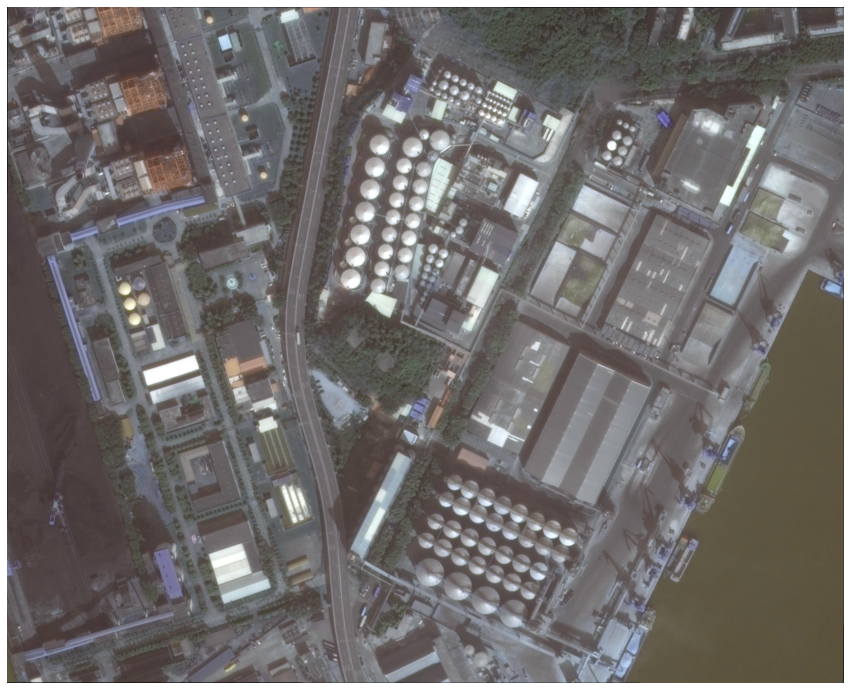

In [5]:
plt.axis('off')

plt.imshow(img)
plt.show()

저장되어 있는 어노테이션(바운딩 박스) 값을 불러옵니다. 

isarralike: False
imgids: ['P2709']
filename: example\images\P2709.png


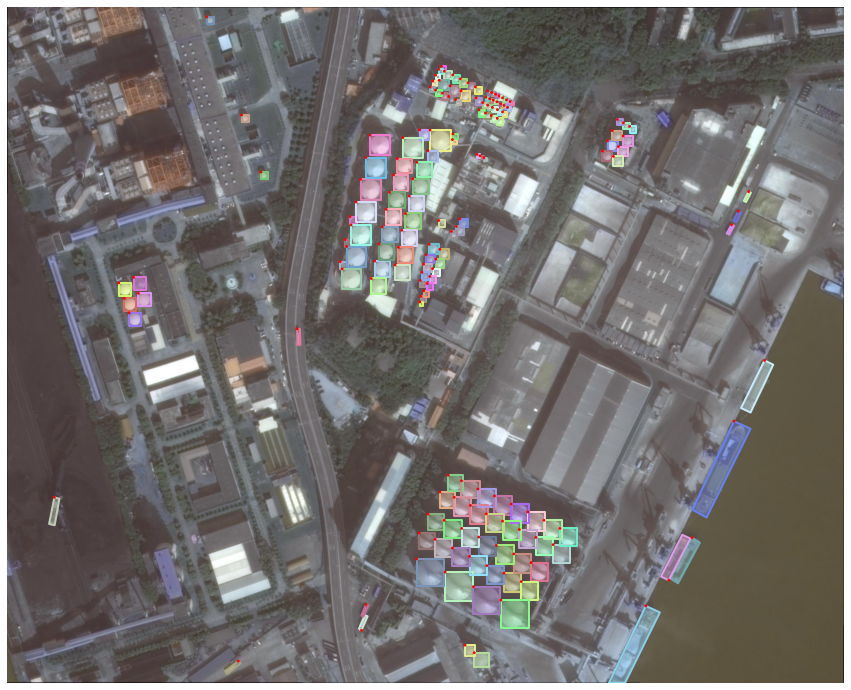

In [6]:
anns = example.loadAnns(imgId=imgid)
# print(anns)
example.showAnns(anns, imgid, 2)

## Split Image And Label
이미지를 패치 단위로 자르기 위해 ImgSplit 모듈을 불러옵니다. 

ImgSplit 모듈의 splitbase 함수는 원본 이미지를 패치 단위로 자르며, 어노테이션의 값을 보존해줍니다.

모듈을 테스트 하기전 아래의 명령어를 통해 폴더를 생성해줍니다.
```
  mkdir examplesplit
  mkdir examplesplit/images
  mkdir examplesplit/labelTxt
```

어노테이션 정보가 없는 테스트 데이터셋을 자르기 위해서는 "SplitOnlyImage.py" 모듈을 참고하여 사용합니다.

In [9]:
from ImgSplit import splitbase

In [10]:
split = splitbase(r'example', 
                 r'examplesplit', choosebestpoint=True)
split.splitdata(0.5)
split.splitdata(1)
split.splitdata(2)

In [7]:
examplesplit = DOTA('examplesplit')

In [8]:
imgids = examplesplit.getImgIds(catNms=['plane'])
imgid = imgids[1]
img = examplesplit.loadImgs(imgid)[0]

isarralike: False
imgids: ['P1088__2__1848___0']
filename: examplesplit/images/P1088__2__1848___0.png


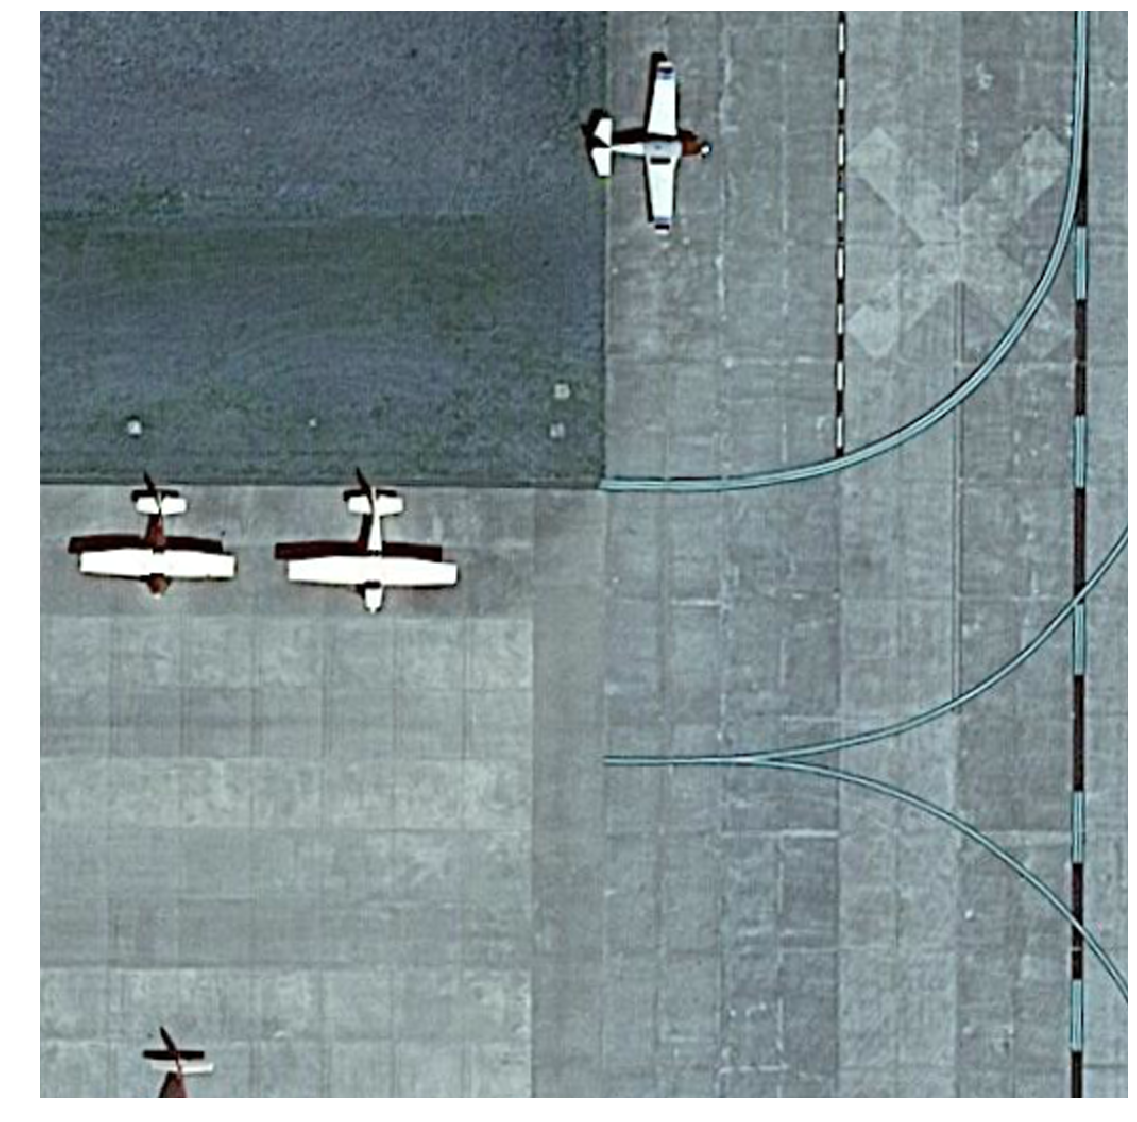

In [9]:
plt.axis('off')

plt.imshow(img)
plt.show()

isarralike: False
imgids: ['P1088__2__1848___0']
filename: examplesplit/images/P1088__2__1848___0.png


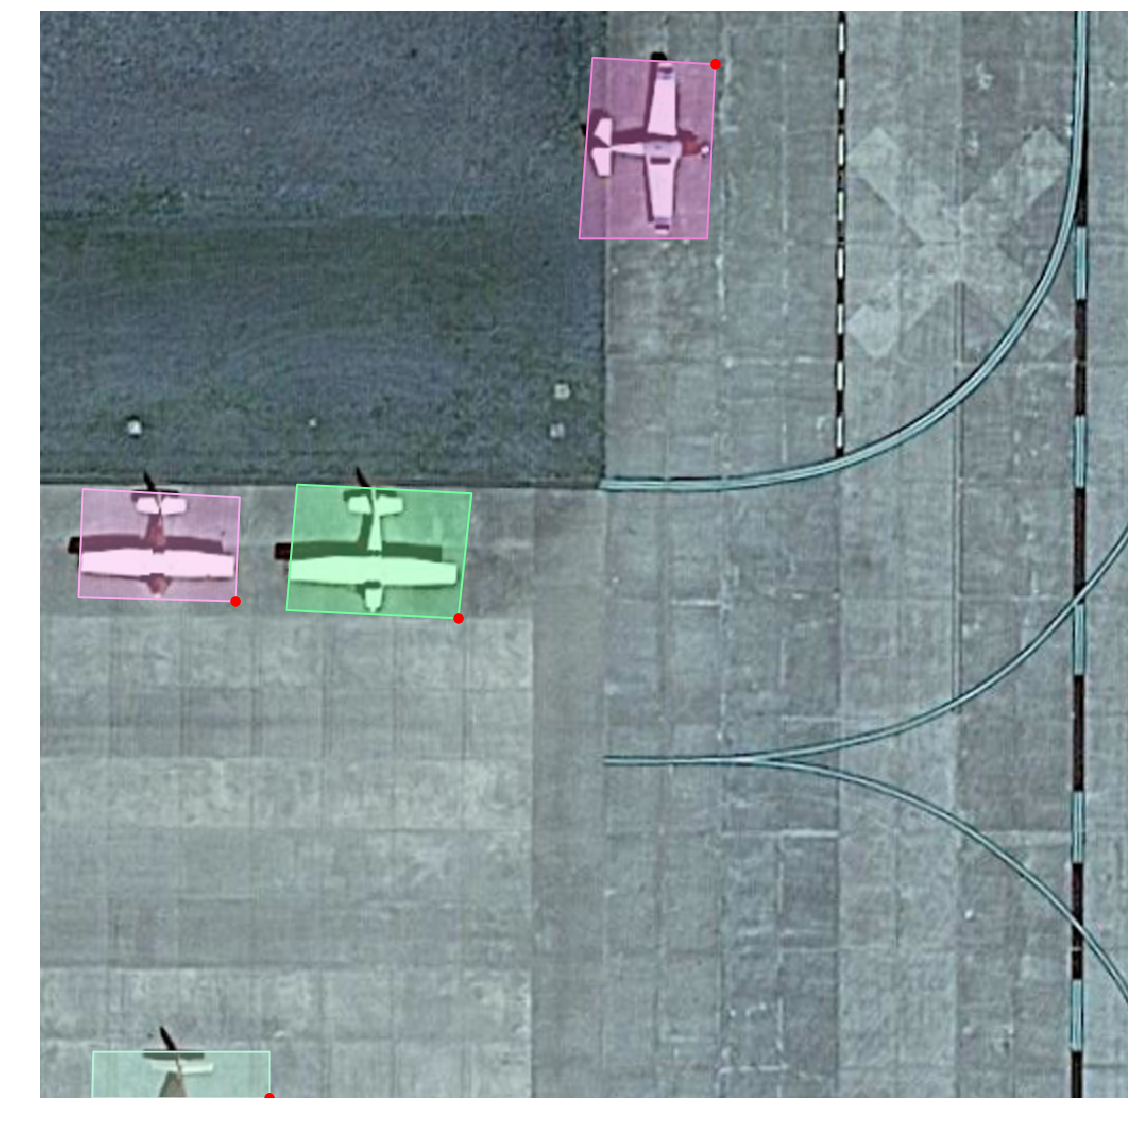

In [10]:
anns = examplesplit.loadAnns(imgId=imgid)
# print(anns)
examplesplit.showAnns(anns, imgid, 2)

## 조각난 패치 합치기 
조각난 패치를 다시 합치기 위해 ResultMerge 모듈의 mergebypoly 함수를 사용합니다.

In [11]:
from ResultMerge import mergebypoly

In [12]:
util.groundtruth2Task1(r'examplesplit/labelTxt',
                      r'Task1')
mergebypoly(r'Task1',
           r'Task1_merge')
util.Task2groundtruth_poly(r'Task1_merge',
                          r'restoredexample/labelTxt')

In [13]:
filepath = 'example/labelTxt'
imgids = util.GetFileFromThisRootDir(filepath)
imgids = [util.custombasename(x) for x in imgids]
print(imgids)

['P0770', 'P1234', 'P1088', 'P2709', 'P0706', 'P1888', 'P2598']


isarralike: False
imgids: ['P1088']
filename: example/images/P1088.png


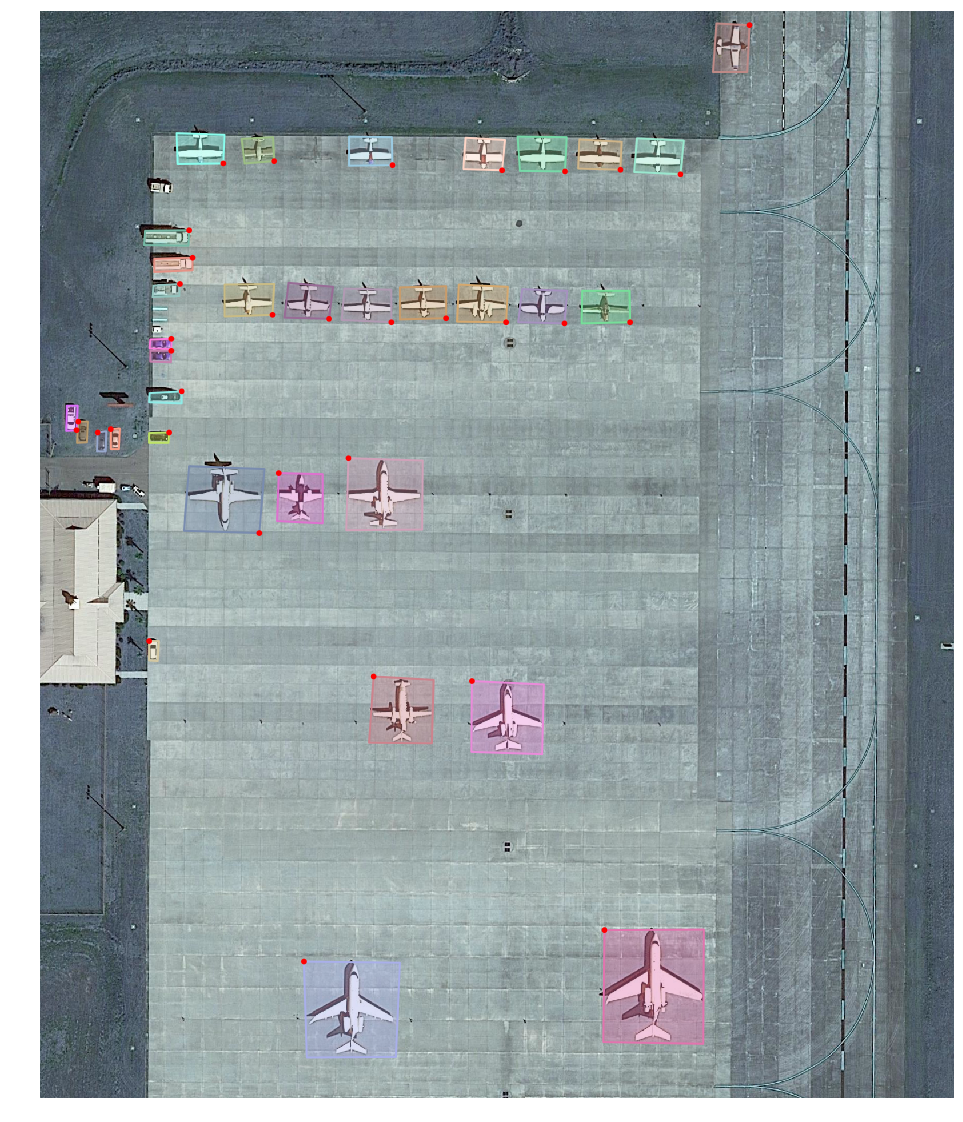

In [14]:
example = DOTA(r'example')
num = 2
anns = example.loadAnns(imgId=imgids[num])
# print(anns)
example.showAnns(anns, imgids[num], 2)

isarralike: False
imgids: ['P1088']
filename: restoredexample/images/P1088.png


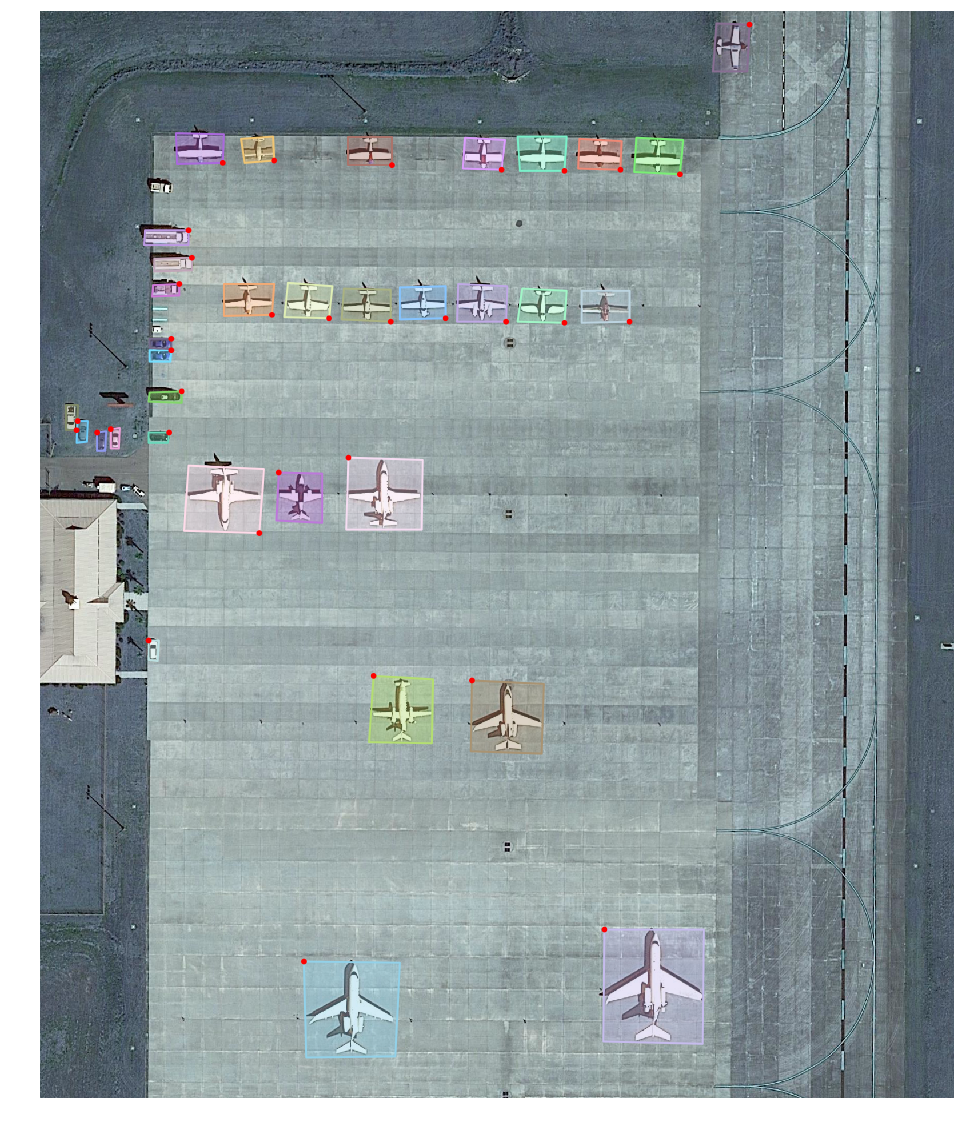

In [15]:
restored = DOTA(r'restoredexample')
num = 2
anns = restored.loadAnns(imgId=imgids[num])
# print(anns)
restored.showAnns(anns, imgids[num], 2)